In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy as cp
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score

from typing import Tuple

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
data = pd.read_csv('../../Data/20x91.csv')
data.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,pub_rec,earliest_cr_line_month,earliest_cr_line_year,term,initial_list_status,grade,sub_grade,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,loan_status_bin
0,-0.872628,0.503581,0.572069,0.682326,0.682323,-0.405165,-0.986330,0.012921,0.800766,0.257759,1.655427,0.676995,-0.076039,-0.125241,-0.375888,-0.217886,-0.270704,0.690939,1.03777,0.791627,0.270731,-0.016391,1.090377,-0.008029,-0.008029,-0.356997,-0.868052,-0.079872,-0.338635,-1.339332,-0.250197,-0.117242,7.035681,-0.118367,-0.10911,-0.314762,-0.036377,-0.179301,-0.0771,-0.048454,-0.052518,-0.122499,-0.089767,-0.152783,-0.405178,-0.146363,-0.120312,-0.047098,-0.054833,-0.274485,-0.189518,-0.081357,-0.040178,-0.192329,-0.128462,-0.087738,-0.097419,-0.11419,-0.14521,-0.162692,-0.037543,-0.163594,-0.130861,-0.122499,-0.073787,-0.050633,-0.177731,-0.034865,-0.054338,-0.064365,-0.192629,-0.072824,-0.122499,-0.307157,-0.183316,-0.096629,-0.104898,5.332434,-0.065945,-0.113949,-0.044019,-0.130009,-0.293205,-0.086423,-0.179939,-0.041367,-0.148531,-0.109613,-0.057433,-0.047781,1.0
1,1.718531,0.772725,1.749064,0.928630,0.928625,-1.135245,1.241494,2.298594,2.322233,-0.117413,-0.904407,0.676995,-0.076039,-0.125241,-0.375888,0.957605,-0.830117,0.690939,1.03777,-0.473750,-0.279696,-0.016391,1.090377,-0.008029,-0.008029,-0.356997,-0.868052,-0.079872,-0.338635,0.746641,-0.250197,-0.117242,-0.142133,-0.118367,-0.10911,-0.314762,-0.036377,-0.179301,-0.0771,-0.048454,-0.052518,-0.122499,-0.089767,-0.152783,-0.405178,-0.146363,-0.120312,-0.047098,-0.054833,-0.274485,5.276548,-0.081357,-0.040178,-0.192329,-0.128462,-0.087738,-0.097419,-0.11419,-0.14521,-0.162692,-0.037543,-0.163594,-0.130861,-0.122499,-0.073787,-0.050633,-0.177731,-0.034865,-0.054338,-0.064365,-0.192629,-0.072824,-0.122499,-0.307157,-0.183316,-0.096629,-0.104898,-0.187532,-0.065945,-0.113949,-0.044019,-0.130009,-0.293205,-0.086423,-0.179939,-0.041367,-0.148531,-0.109613,-0.057433,-0.047781,1.0
2,0.752113,-0.126322,1.291724,-0.302888,-0.302887,0.946418,0.680639,1.067847,0.640612,0.202920,-0.051129,-0.380734,-0.076039,-0.125241,-0.375888,-1.687248,0.288709,0.690939,1.03777,0.791627,1.371584,-0.016391,-0.917114,-0.008029,-0.008029,-0.356997,1.152005,-0.079872,-0.338635,0.746641,-0.250197,-0.117242,-0.142133,-0.118367,-0.10911,-0.314762,-0.036377,-0.179301,-0.0771,-0.048454,-0.052518,-0.122499,-0.089767,-0.152783,-0.405178,-0.146363,-0.120312,-0.047098,-0.054833,-0.274485,-0.189518,-0.081357,-0.040178,-0.192329,-0.128462,-0.087738,-0.097419,-0.11419,-0.14521,6.146578,-0.037543,-0.163594,-0.130861,-0.122499,-0.073787,-0.050633,-0.177731,-0.034865,-0.054338,-0.064365,-0.192629,-0.072824,-0.122499,-0.307157,-0.183316,-0.096629,-0.104898,-0.187532,-0.065945,-0.113949,-0.044019,-0.130009,-0.293205,-0.086423,-0.179939,-0.041367,-0.148531,-0.109613,-0.057433,-0.047781,0.0
3,0.620448,0.288623,0.434069,2.160147,2.160138,-0.405165,0.373911,-0.690363,0.160148,0.413576,-0.904407,-0.380734,-0.076039,-0.125241,-0.375888,1.251477,-0.550411,0.690939,1.03777,0.791627,0.270731,-0.016391,1.090377,-0.008029,-0.008029,-0.356997,-0.868052,-0.079872,-0.338635,0.746641,-0.250197,-0.117242,-0.142133,-0.118367,-0.10911,-0.314762,-0.036377,-0.179301,-0.0771,-0.048454,-0.052518,-0.122499,-0.089767,-0.152783,-0.405178,-0.146363,-0.120312,-0.047098,-0.054833,-0.274485,-0.189518,-0.081357,-0.040178,-0.192329,-0.128462,-0.087738,-0.097419,-0.11419,-0.14521,-0.162692,-0.037543,-0.163594,-0.130861,-0.122499,-0.073787,-0.050633,-0.177731,-0.034865,-0.054338,-0.064365,-0.192629,-0.072824,-0.122499,-0.307157,5.455068,-0.0

In [4]:
data.shape

(93073, 91)

In [5]:
data.loan_status_bin.value_counts()
#0 = Defaulted Loans
#1 = Loans Paid In Full

1.0    54388
0.0    38685
Name: loan_status_bin, dtype: int64

In [6]:
X = data.drop('loan_status_bin', axis=1)
X.shape

(93073, 90)

In [7]:
y = data['loan_status_bin']

In [8]:
lr1 = LogisticRegression()

In [9]:
steps = [('model', lr1)]
pipeline = Pipeline(steps=steps)

In [10]:
#Accuracy:

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print(scores)

score = np.mean(scores)
print(score)

[0.61343003 0.61713672 0.61756648 0.61335554 0.61228108]
0.6147539686985506


In [11]:
#Aggregated Confusion Matrix From RepeatedStratifiedKFold: 
y_pred = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[11972, 26713],
       [ 9143, 45245]])

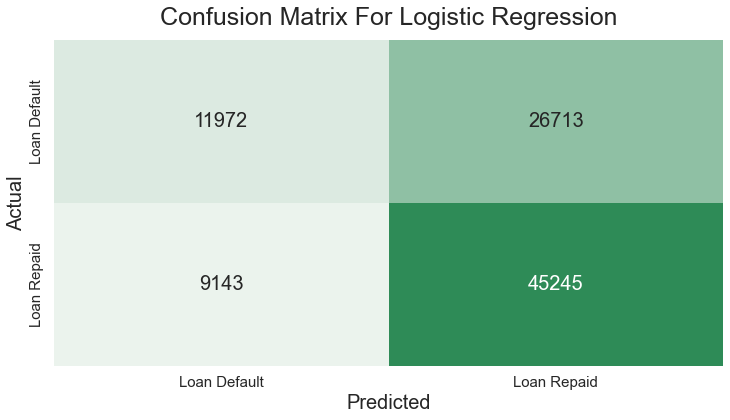

In [12]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)
res.set_yticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [13]:
accuracy_score(y, y_pred)

0.6147540102929958

In [14]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

45245
26713
9143
11972
0.6147540102929958


In [15]:
#Re-examine original pool of accepted LC Loans: 

print(data.loan_status_bin.value_counts())
#0 = Loan Defaulted
#1 = Loan Fully Paid

good_loan = data.loan_status_bin.value_counts()[1]
bad_loan = data.loan_status_bin.value_counts()[0]

print()
print(good_loan / (good_loan + bad_loan))

#Random investment would give us 59% chance of pickkng a good loan

1.0    54388
0.0    38685
Name: loan_status_bin, dtype: int64

0.5843585142844864


In [16]:
#Positive Predictive Value (or Precision)
#Logistic Model only does 3% better than Null Model or "random investment"
TP / (TP+FP)

0.6287695600211234

In [17]:
#Obtain predicted probabilities (not predicted classes) from RSKF: 
y_pred_prob = cross_val_predict(pipeline, X, y, cv=cv, n_jobs=-1, method='predict_proba')

In [18]:
y_pred_prob

array([[0.41209131, 0.58790869],
       [0.41980977, 0.58019023],
       [0.67990877, 0.32009123],
       ...,
       [0.28362402, 0.71637598],
       [0.37051898, 0.62948102],
       [0.23982988, 0.76017012]])

In [19]:
#Obtaining classification based on desired threshold of 0.8: 

y_pred_success = (y_pred_prob[:, 1] > 0.8).astype('float')
y_pred_success

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
conf_mat = confusion_matrix(y, y_pred_success)
conf_mat

array([[38316,   369],
       [52788,  1600]])

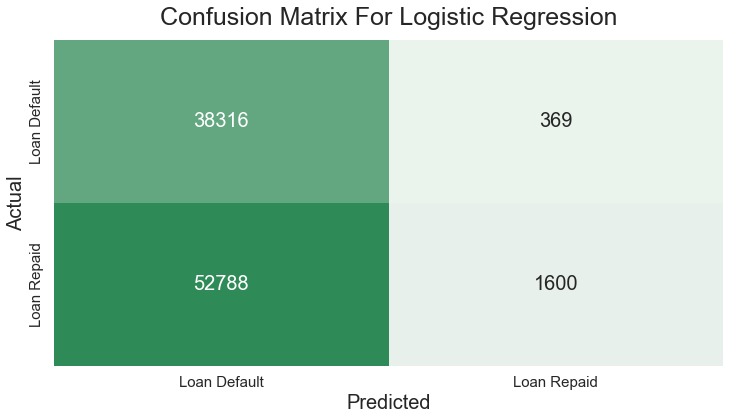

In [21]:
sns.set(rc = {'figure.figsize':(12,6)})
#cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.light_palette('seagreen', as_cmap=True)

res = sns.heatmap(conf_mat, annot=True, fmt='d', annot_kws={"size":20},
#            xticklabels = ['Good = Paid In Full', 'Bad = Default'],
#            yticklabels = ['Loan Paid In Full', 'Bad = Default'], 
            cmap=cmap, cbar=False)

res.set_xticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)
res.set_yticklabels(['Loan Default', 'Loan Repaid'], fontsize=15)


plt.title('Confusion Matrix For Logistic Regression', fontsize=25, pad=15)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

In [22]:
accuracy_score(y, y_pred_success)

0.42886766301720153

In [23]:
TN, FP, FN, TP = conf_mat.ravel()
print(TP)
print(FP)
print(FN)
print(TN)
print((TP + TN) / (TN + TP + FP + FN))

1600
369
52788
38316
0.42886766301720153


In [24]:
#Positive Predictive Value (or Precision)
#Logistic Model only does 23% better than Null Model or "random investment"
TP / (TP+FP)

0.8125952260030472

In [ ]:
## Next question. what was characteristic of the 217 loans that defaulted??
## Get all loans which you predicted greater than 80% and find out which ones defaulted.
## Any pattern?????

In [ ]:
#Do we drop all observations where the source is not verified? 
#Do we drop all observations loan amount is greater than half of one's income? 